In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('play_by_play2019.csv.gz', compression='gzip', low_memory=False)
data = data.loc[data.season_type=='REG']

In [3]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.reset_option('max_columns')
#pd.reset_option('max_rows')

In [4]:
#list(data)

In [5]:
#data[['down','desc']]

In [6]:
against_eagles = data.loc[data.defteam == 'PHI']

In [7]:
#which teams passed and run more against PHI
teams_against_eagles = against_eagles.groupby('posteam',as_index = False).agg({'pass':'sum',
                                                                                'rush':'sum'})

In [8]:
#.assign() to add new column
teams_against_eagles = teams_against_eagles.assign(pass_rate = (teams_against_eagles['pass'])/(teams_against_eagles['pass'] + teams_against_eagles['rush']))

In [9]:
teams_against_eagles.sort_values('pass_rate', ascending = False)

,posteam,pass,rush,pass_rate
5,GB,63,15,0.807692
6,MIA,53,18,0.746479
0,ATL,46,16,0.741935
1,BUF,43,16,0.728814
12,WAS,80,35,0.695652
9,NYG,85,39,0.685484
8,NE,50,23,0.684932
10,NYJ,38,20,0.655172
3,DAL,80,51,0.610687
11,SEA,36,24,0.600000


In [10]:
qbs_against_eagles = against_eagles.groupby(['passer','posteam'], as_index = False).agg({'epa':'mean',
                                                                                         'cpoe':'mean',
                                                                                         'play_id':'count'})

In [11]:
qbs_against_eagles = qbs_against_eagles.loc[qbs_against_eagles.play_id >= 15]

In [12]:
qbs_against_eagles.sort_values('epa', ascending= False)

,passer,posteam,epa,cpoe,play_id
9,K.Cousins,MIN,0.628145,14.763255,34
1,C.Keenum,WAS,0.452061,3.083270,47
15,R.Fitzpatrick,MIA,0.392988,7.879925,52
0,A.Rodgers,GB,0.301441,4.214832,63
13,M.Stafford,DET,0.146698,-1.733422,34
5,D.Prescott,DAL,0.080970,1.090204,80
3,D.Haskins,WAS,0.039208,2.199797,33
12,M.Ryan,ATL,0.031080,-4.271183,46
6,E.Manning,NYG,-0.042663,-9.839586,32
7,J.Allen,BUF,-0.054662,-13.626833,43


In [13]:
COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

In [14]:
from adjustText import adjust_text

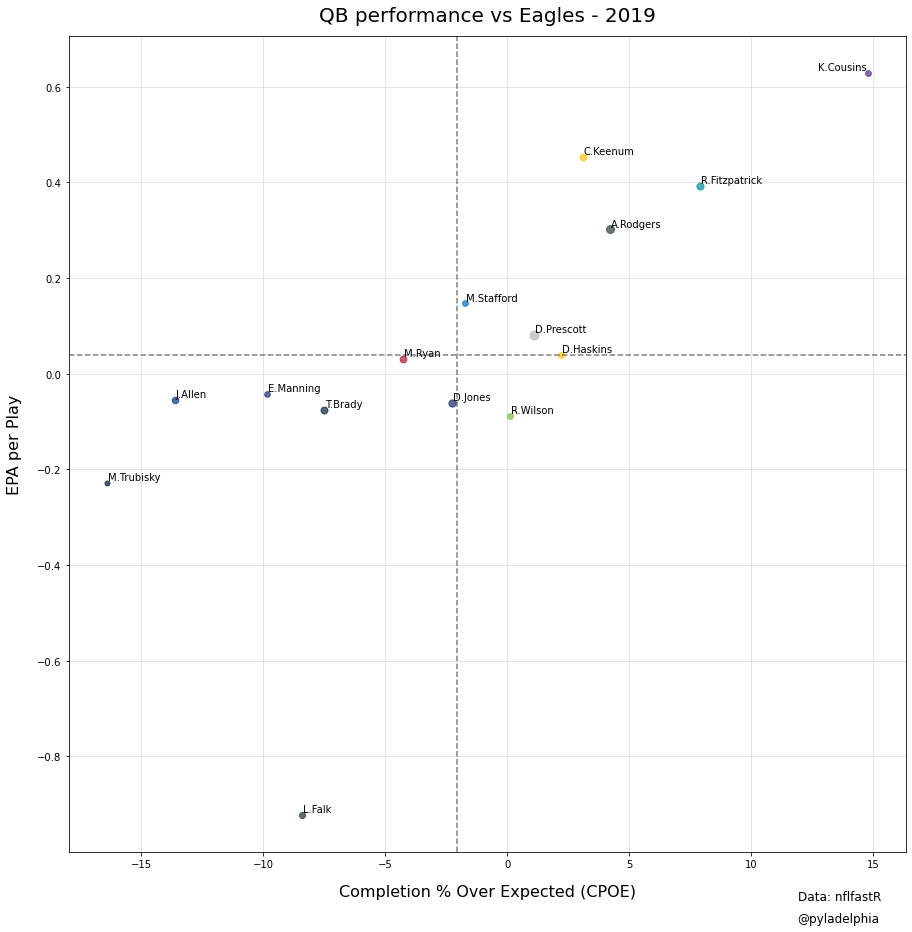

In [15]:
fig, ax = plt.subplots(figsize=(15,15))

#Create vertical and horizontal lines for averages of each metric
ax.axvline(x=qbs_against_eagles.cpoe.mean(), linestyle='--', alpha=.5, color='black')
ax.axhline(y=qbs_against_eagles.epa.mean(), linestyle='--', alpha=.5, color='black')

#Create a dot for each player
#Find their team color in the COLORS dictionary
#s stands for size, the dot size is proportional to the QBs number of plays
for i in range(len(qbs_against_eagles)):
    ax.scatter(qbs_against_eagles.cpoe.iloc[i], qbs_against_eagles.epa.iloc[i],
               s=qbs_against_eagles.play_id.iloc[i], alpha=.7,
               color=COLORS[qbs_against_eagles.posteam.iloc[i]])

#Add text to each dot
texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(
    qbs_against_eagles.cpoe, qbs_against_eagles.epa, qbs_against_eagles.passer)]

adjust_text(texts)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Remove top and right boundary lines
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

#Add title, labels, and source
ax.set_title('QB performance vs Eagles - 2019',fontsize=20,pad=15)
ax.set_xlabel('Completion % Over Expected (CPOE)',fontsize=16,labelpad=15)
ax.set_ylabel('EPA per Play',fontsize=16,labelpad=15)
plt.figtext(.8,.06, '@pyladelphia', fontsize = 12)
plt.figtext(.8,.08,'Data: nflfastR',fontsize=12)

plt.show()